In [1]:
import json
import numpy as np
import pandas as pd
from scipy import stats
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import ticker
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline
orange, purple, elm ='#FFCC00', '#666599', '#217C7E'
blue, red, grey, green ='#336699', '#9A3334', '#AAAAAA', '#335333'
%matplotlib inline
rolling=7
mydpi=600
s=18

__author__ = 'HK Dambanemuya'
__version__ = 'Python2'

In [2]:
with open('../Data/Fusion/news_dates.json') as news_f: news = json.load(news_f)
with open('../Data/Fusion/blog_dates.json') as blogs_f: blogs = json.load(blogs_f)
with open('../Data/Fusion/discussion_dates.json') as discussions_f: discussions = json.load(discussions_f) 
data = pd.read_csv("../Data/Fusion/liwc_source.csv")

In [3]:
dates = sorted(list(set(news.keys()).union(set(blogs.keys())).union(set(discussions.keys()))))[1:-1]
dates_ = [x[5:] for x in dates]
news_v, blogs_v, discussions_v = [], [], []
for date in dates:
    news_v.append(news.get(date))
    blogs_v.append(blogs.get(date))
    discussions_v.append(discussions.get(date))
news_rv = pd.Series(news_v).fillna(0).rolling(rolling, win_type='triang').sum()
blogs_rv = pd.Series(blogs_v).fillna(0).rolling(rolling, win_type='triang').sum()
discussions_rv = pd.Series(discussions_v).fillna(0).rolling(rolling, win_type='triang').sum()
assert len(news_rv) == len(blogs_rv) == len(discussions_rv)
n= len(news_rv)

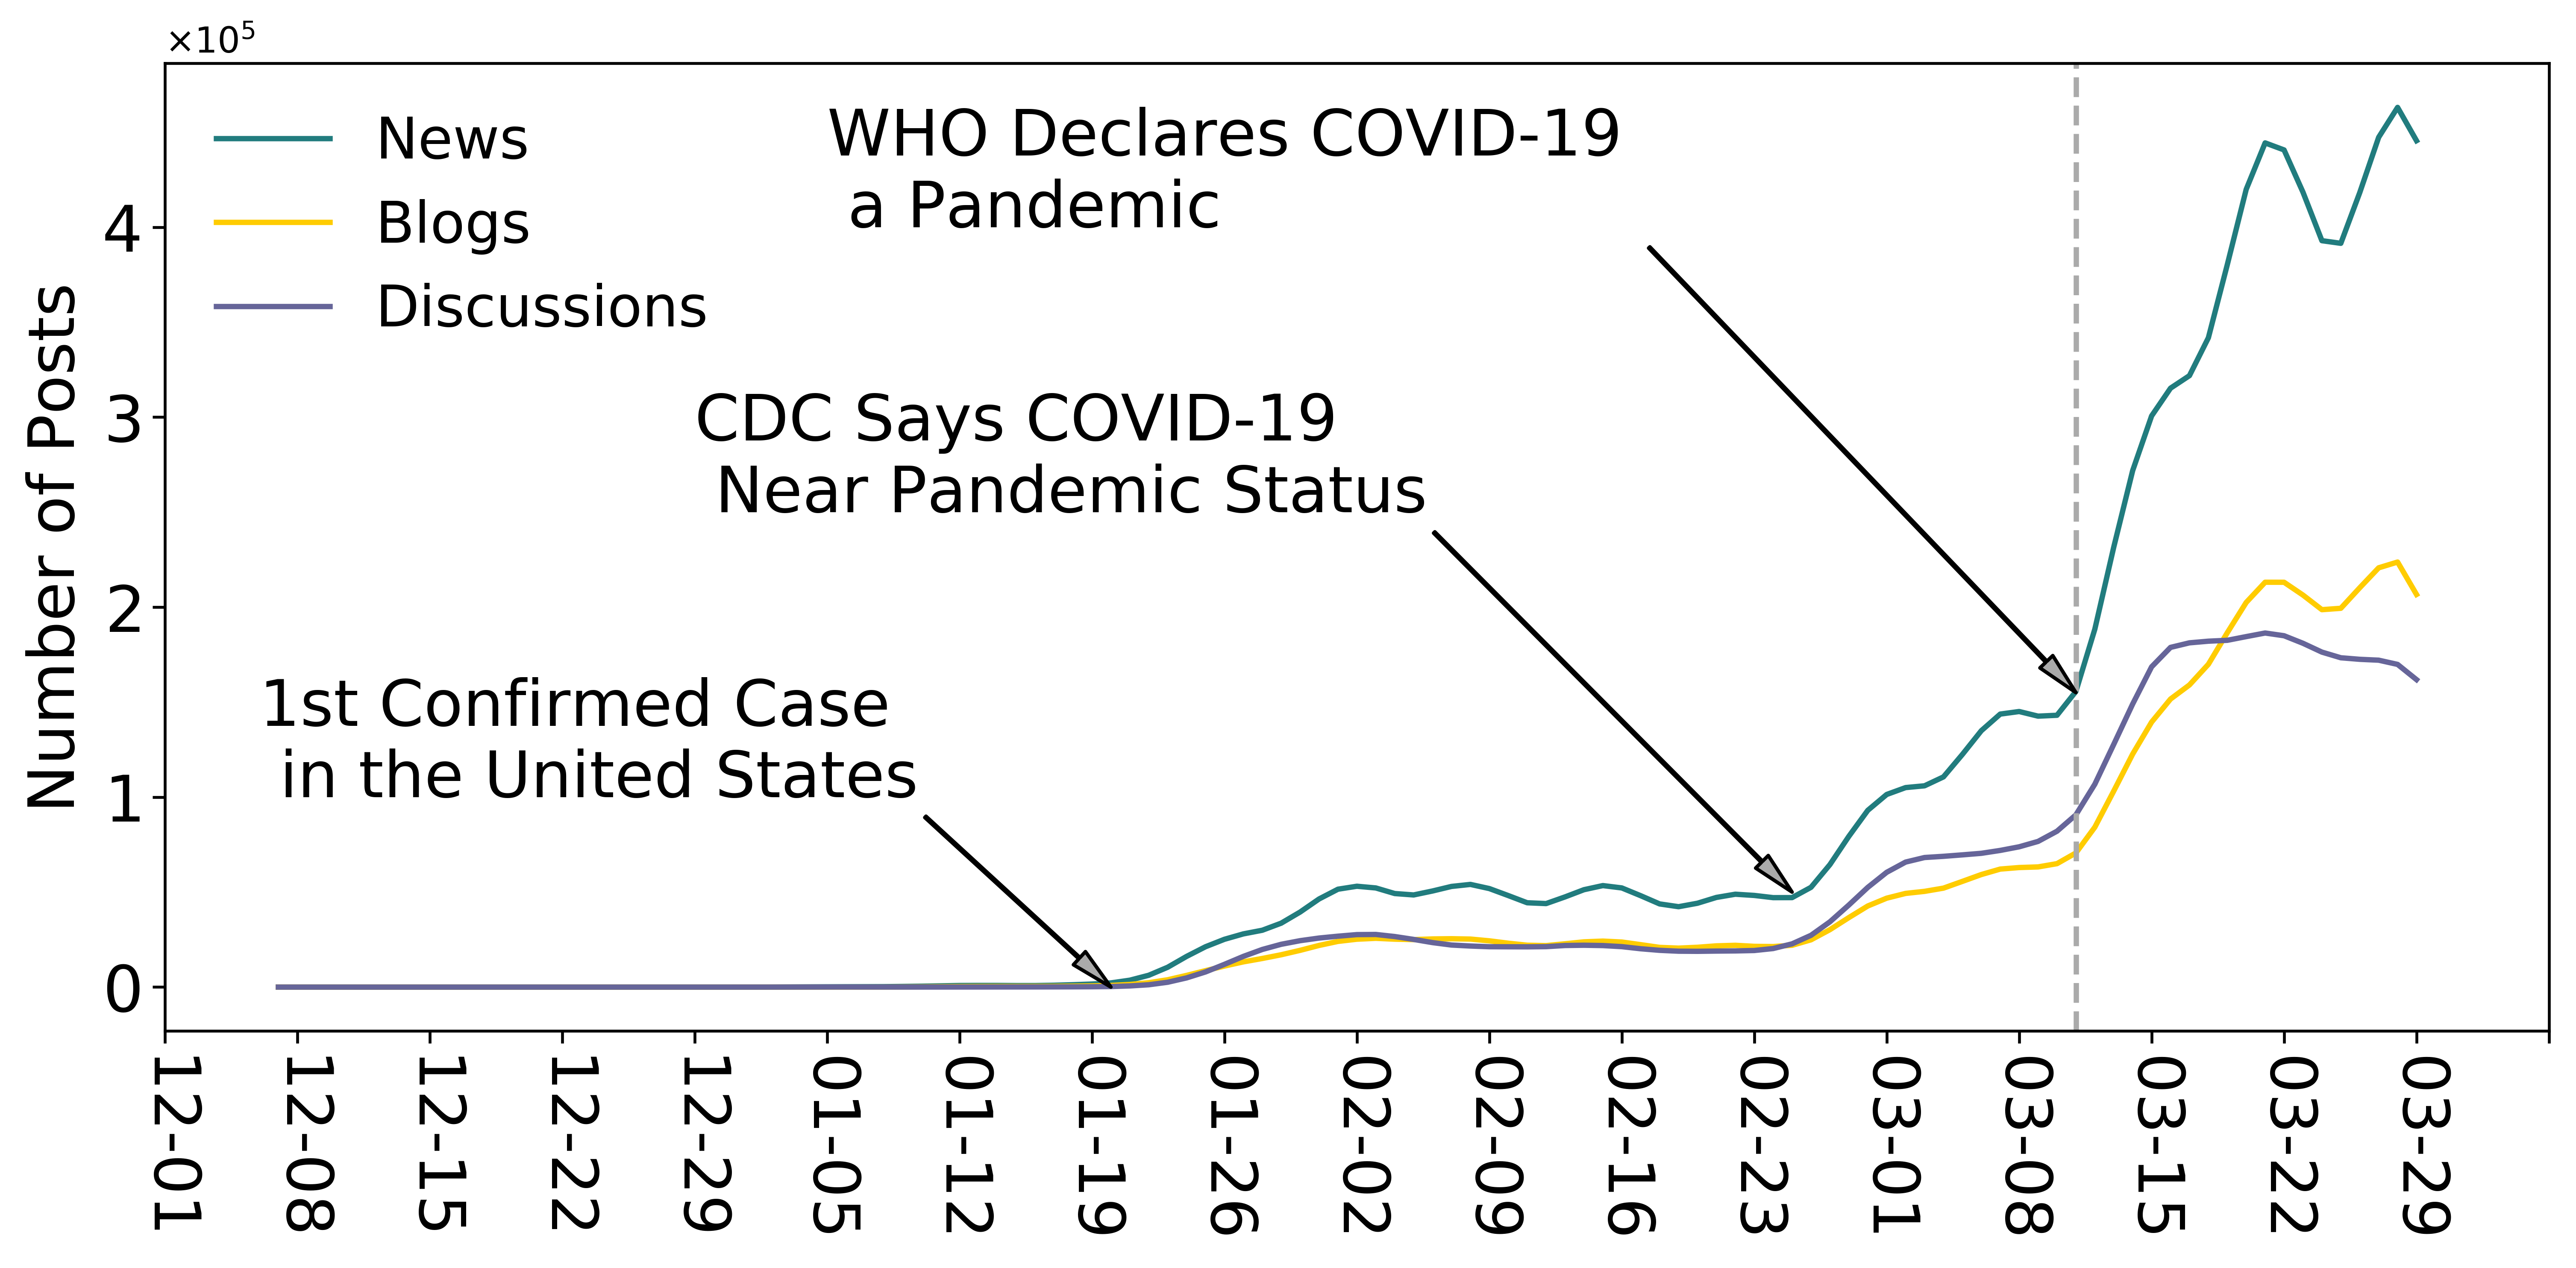

In [4]:
fig = plt.figure(figsize=(12,5), dpi=mydpi)

ax = plt.subplot(1, 1, 1)

plt.plot(dates_, news_rv, color=elm, label='News')
plt.plot(dates_, blogs_rv, color=orange, label='Blogs')
plt.plot(dates_, discussions_rv, color=purple, label='Discussions')
plt.axvline(x=dates.index('2020-03-11'), ymin=0, ymax=1, color=grey, linestyle='--')
plt.annotate('1st Confirmed Case \n in the United States', fontsize=s, xy=(dates.index('2020-01-20'), 10), xytext=(5, 100000), 
            arrowprops=dict(facecolor=grey, shrink=0.0, width=0.5, headwidth=5),
            )
plt.annotate('CDC Says COVID-19 \n Near Pandemic Status', fontsize=s, xy=(dates.index('2020-02-25'), 50000), xytext=(28, 250000),
            arrowprops=dict(facecolor=grey, shrink=0.0, width=0.5, headwidth=5),
            )
plt.annotate('WHO Declares COVID-19 \n a Pandemic', fontsize=s, xy=(dates.index('2020-03-11'), 155000), xytext=(35, 400000),
            arrowprops=dict(facecolor=grey, shrink=0.0, width=0.5, headwidth=5),
            )
plt.xticks(np.arange(0, n+8, 7), rotation=270, fontsize=s)
plt.ylabel("Number of Posts", fontsize=s)
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 
plt.yticks(fontsize=s)
plt.legend(loc='best', fontsize=s-2, frameon=False)
plt.show()